In [81]:
%matplotlib notebook
import pandas as pd
import os
import glob
import matplotlib.pyplot as plot

In [82]:
# source: ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/
# Data for 2017, North and South by Month
paths = ['../data/North_2017/', '../data/South_2017/']
#print(glob.glob(os.path.join(paths[0], '*.csv')))
all_files = (glob.glob(os.path.join(p, '*.csv')) for p in paths)

df_from_each_file = (pd.read_csv(f) for files in all_files for f in files)

concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df.head(10)

,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.60,12.36
1,1980,1,Goddard,N,15.05,11.88
2,1981,1,Goddard,N,15.11,11.85
3,1982,1,Goddard,N,15.34,12.13
4,1983,1,Goddard,N,15.16,11.94
5,1984,1,Goddard,N,14.69,11.62
6,1985,1,Goddard,N,14.96,11.64
7,1986,1,Goddard,N,15.12,11.82
8,1987,1,Goddard,N,15.28,11.84
9,1988,1,-9999,N,-9999.00,-9999.00


In [83]:
len(concatenated_df.index) # getting number of rows

922

In [84]:
list(concatenated_df)

['year', ' mo', '    data_type', ' region', ' extent', '   area']

In [85]:
concatenated_df['date'] = concatenated_df[' mo'].apply(str) + '-' + concatenated_df['year'].apply(str)
concatenated_df['date'] = pd.to_datetime(concatenated_df['date'], format='%m-%Y')
concatenated_df = concatenated_df[['    data_type', ' region',' extent', '   area', 'date']]

In [86]:
concatenated_df.head()

,data_type,region,extent,area,date
0,Goddard,N,15.60,12.36,1979-01-01
1,Goddard,N,15.05,11.88,1980-01-01
2,Goddard,N,15.11,11.85,1981-01-01
3,Goddard,N,15.34,12.13,1982-01-01
4,Goddard,N,15.16,11.94,1983-01-01


In [87]:
concatenated_df['    data_type'].unique()

array(['      Goddard', '        -9999', '      NRTSI-G'], dtype=object)

In [88]:
concatenated_df = concatenated_df[concatenated_df['    data_type'] != '        -9999']
concatenated_df.head()

,data_type,region,extent,area,date
0,Goddard,N,15.60,12.36,1979-01-01
1,Goddard,N,15.05,11.88,1980-01-01
2,Goddard,N,15.11,11.85,1981-01-01
3,Goddard,N,15.34,12.13,1982-01-01
4,Goddard,N,15.16,11.94,1983-01-01


<IPython.core.display.Javascript object>


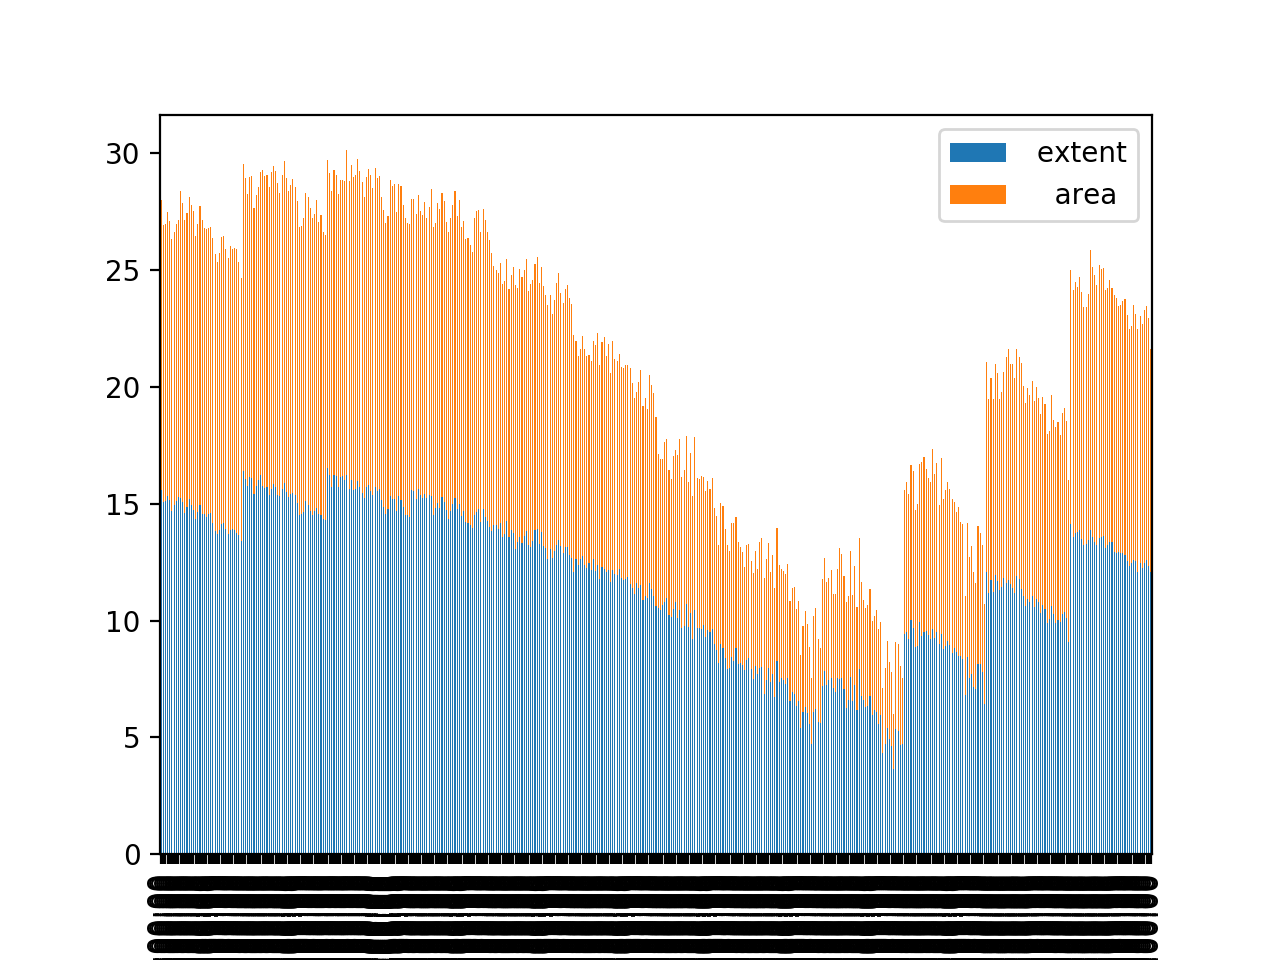

<IPython.core.display.Javascript object>


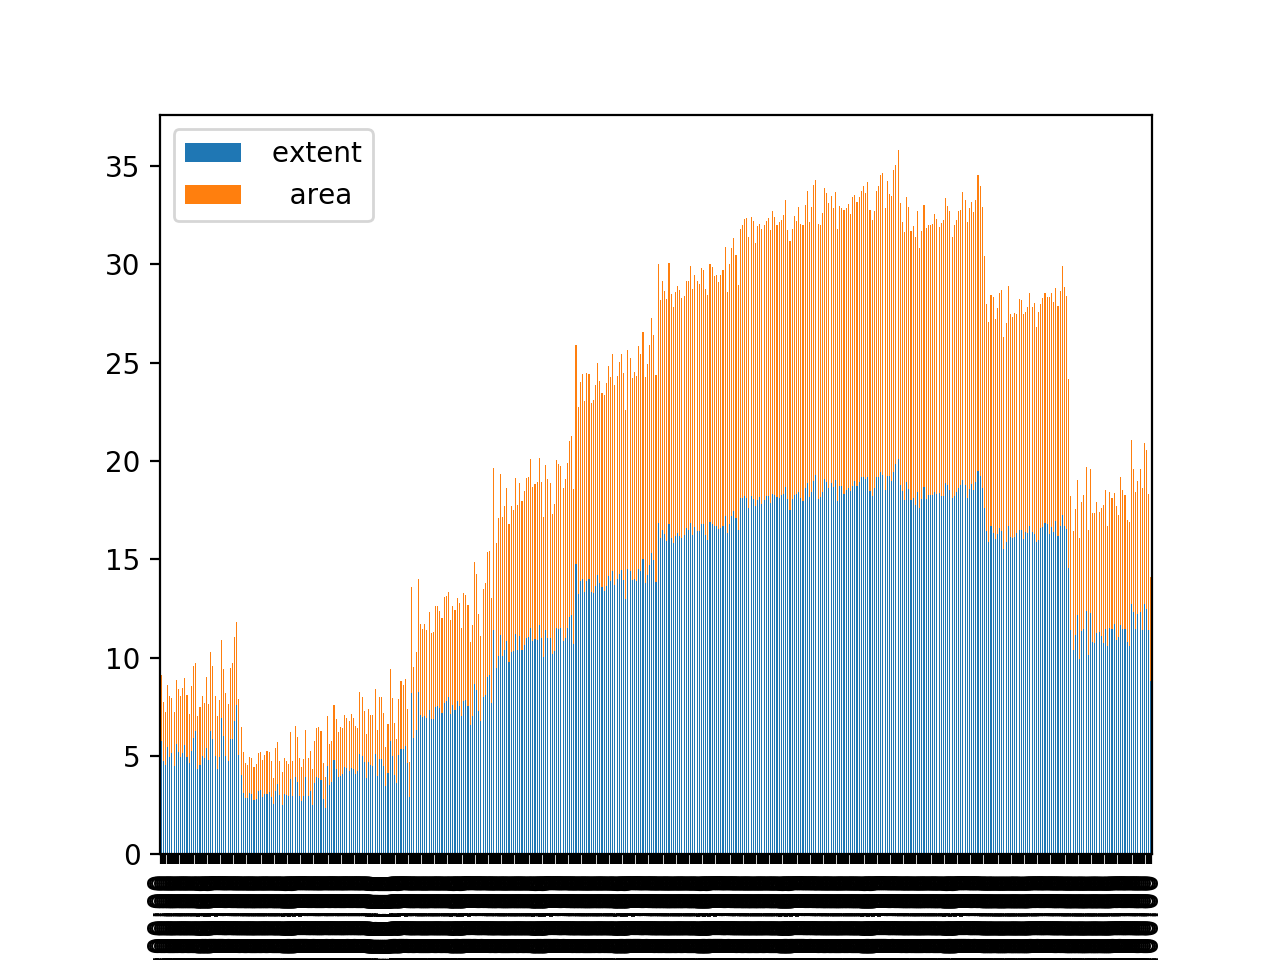

 region
      N    Axes(0.125,0.11;0.775x0.77)
      S    Axes(0.125,0.11;0.775x0.77)
dtype: object

In [89]:
concatenated_df.set_index(['date'],inplace=True)
concatenated_df[[' region', ' extent', '   area']].groupby([' region']).plot(kind='bar', stacked=True)